In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find db structure - Measurement
first_measurement = session.query(Measurement).first()
first_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x18beaaa4518>,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0}

In [10]:
# Find db structure - Station
first_station = session.query(Station).first()
first_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x18beaaa4cc0>,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [13]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).all()
results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(results)
precip_df.set_index("date", inplace=True)
precip_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [15]:
# Sort the dataframe by date
precip_df.sort_index(axis=0, inplace=True)
precip_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


In [16]:
# Replace NaNs with 0s
precip_df.fillna(0, inplace=True)
precip_df.head(20)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


In [17]:
# Group by date and add all stations' data
precip_grouped = precip_df.groupby("date").sum()
precip_grouped

,prcp
date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.58


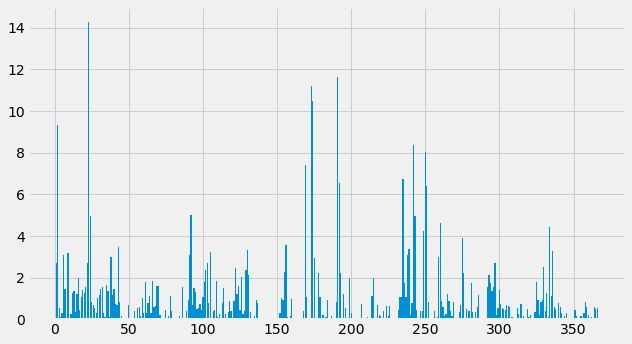

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis = np.arange(1, 367, 1)
y_values = precip_grouped["prcp"]

plt.figure(figsize=(9,5))
plt.bar(x_axis, y_values)
plt.tight_layout()
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.id).count()
station_count

9

In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
selection = [Station.id, Station.name, Station.station, Measurement.station, Measurement.date]

same_station = session.query(*selection).filter(Station.station == Measurement.station).all()
same_station

[(1, 'WAIKIKI 717.2, HI US', 'USC00519397', 'USC00519397', '2010-01-01'),
 (1, 'WAIKIKI 717.2, HI US', 'USC00519397', 'USC00519397', '2010-01-02'),
 (1, 'WAIKIKI 717.2, HI US', 'USC00519397', 'USC00519397', '2010-01-03'),
 (1, 'WAIKIKI 717.2, HI US', 'USC00519397', 'USC00519397', '2010-01-04'),
 (1, 'WAIKIKI 717.2, HI US', 'USC00519397', 'USC00519397', '2010-01-06'),
 (1, 'WAIKIKI 717.2, HI US', 'USC00519397', 'USC00519397', '2010-01-07'),
 (1, 'WAIKIKI 717.2, HI US', 'USC00519397', 'USC00519397', '2010-01-08'),
 (1, 'WAIKIKI 717.2, HI US', 'USC00519397', 'USC00519397', '2010-01-09'),
 (1, 'WAIKIKI 717.2, HI US', 'USC00519397', 'USC00519397', '2010-01-10'),
 (1, 'WAIKIKI 717.2, HI US', 'USC00519397', 'USC00519397', '2010-01-11'),
 (1, 'WAIKIKI 717.2, HI US', 'USC00519397', 'USC00519397', '2010-01-12'),
 (1, 'WAIKIKI 717.2, HI US', 'USC00519397', 'USC00519397', '2010-01-14'),
 (1, 'WAIKIKI 717.2, HI US', 'USC00519397', 'USC00519397', '2010-01-15'),
 (1, 'WAIKIKI 717.2, HI US', 'USC00519

In [22]:
# Unpack results and assign to dataframe
sta_obs = list(zip(*same_station))
sta_obs_df = pd.DataFrame({"station_id" : sta_obs[0],
                           "station_name" : sta_obs[1],
                           "station_number" : sta_obs[2],
                           "observation_date" : sta_obs[4]})
sta_obs_df

,station_id,station_name,station_number,observation_date
0,1,"WAIKIKI 717.2, HI US",USC00519397,2010-01-01
1,1,"WAIKIKI 717.2, HI US",USC00519397,2010-01-02
2,1,"WAIKIKI 717.2, HI US",USC00519397,2010-01-03
3,1,"WAIKIKI 717.2, HI US",USC00519397,2010-01-04
4,1,"WAIKIKI 717.2, HI US",USC00519397,2010-01-06
...,...,...,...,...
19545,9,"MANOA LYON ARBO 785.2, HI US",USC00516128,2017-08-19
19546,9,"MANOA LYON ARBO 785.2, HI US",USC00516128,2017-08-20
19547,9,"MANOA LYON ARBO 785.2, HI US",USC00516128,2017-08-21
19548,9,"MANOA LYON ARBO 785.2, HI US",USC00516128,2017-08-22


In [23]:
# Group by station id and count
sta_obs_grouped = sta_obs_df.groupby("station_id").count()
sta_obs_grouped.sort_values(by="observation_date", axis=0, inplace=True, ascending=False)
sta_obs_grouped

,station_name,station_number,observation_date
station_id,,,
7,2772,2772,2772
1,2724,2724,2724
2,2709,2709,2709
6,2669,2669,2669
9,2612,2612,2612
3,2202,2202,2202
8,1979,1979,1979
4,1372,1372,1372
5,511,511,511


In [49]:
# Get station identifier for station 7
station_id_7 = session.query(Station.station, Station.name).filter(Station.id == 7).first()
print(station_id_7)
station_id_7 = station_id_7[0]

('USC00519281', 'WAIHEE 837.5, HI US')


In [50]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_seven = session.query(Measurement.tobs).filter(Measurement.station == station_id_7).all()
station_seven = list(zip(*station_seven))
# print(station_seven[0])
stat_7_temps = list(*station_seven)
stat_7_temps

[70.0,
 62.0,
 74.0,
 75.0,
 74.0,
 76.0,
 69.0,
 66.0,
 70.0,
 75.0,
 64.0,
 60.0,
 61.0,
 68.0,
 64.0,
 66.0,
 67.0,
 70.0,
 67.0,
 67.0,
 69.0,
 60.0,
 75.0,
 75.0,
 65.0,
 75.0,
 69.0,
 67.0,
 66.0,
 69.0,
 72.0,
 67.0,
 65.0,
 64.0,
 67.0,
 67.0,
 68.0,
 69.0,
 66.0,
 69.0,
 61.0,
 71.0,
 70.0,
 70.0,
 66.0,
 71.0,
 61.0,
 68.0,
 67.0,
 62.0,
 65.0,
 69.0,
 63.0,
 62.0,
 61.0,
 64.0,
 72.0,
 68.0,
 68.0,
 68.0,
 71.0,
 69.0,
 65.0,
 67.0,
 71.0,
 70.0,
 69.0,
 69.0,
 70.0,
 69.0,
 70.0,
 73.0,
 74.0,
 67.0,
 68.0,
 64.0,
 65.0,
 68.0,
 68.0,
 72.0,
 67.0,
 64.0,
 71.0,
 70.0,
 72.0,
 73.0,
 74.0,
 69.0,
 71.0,
 72.0,
 71.0,
 74.0,
 73.0,
 71.0,
 71.0,
 69.0,
 69.0,
 72.0,
 68.0,
 75.0,
 69.0,
 65.0,
 68.0,
 65.0,
 66.0,
 64.0,
 69.0,
 69.0,
 70.0,
 69.0,
 69.0,
 69.0,
 70.0,
 77.0,
 77.0,
 71.0,
 71.0,
 70.0,
 70.0,
 72.0,
 73.0,
 71.0,
 70.0,
 72.0,
 73.0,
 72.0,
 68.0,
 76.0,
 77.0,
 73.0,
 69.0,
 71.0,
 73.0,
 73.0,
 77.0,
 73.0,
 73.0,
 72.0,
 72.0,
 71.0,
 73.0,
 72.0,
 72.0,

In [51]:
# Calculate temps    
max_temp = max(stat_7_temps)
min_temp = min(stat_7_temps)
avg_temp = round((sum(stat_7_temps))/len(stat_7_temps), 2)
print(f'The maximum temperature in Waihee was {max_temp}.')
print(f'The minimum temperature in Waihee was {min_temp}.')
print(f'The average temperature in Waihee was {avg_temp}.')

The maximum temperature in Waihee was 85.0.
The minimum temperature in Waihee was 54.0.
The average temperature in Waihee was 71.66.


In [56]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
results = session.query(Measurement.tobs).filter(Measurement.date >= last_year).\
                                            filter(Measurement.station == station_id_7).all()
results = list(zip(*results))
results = list(*results)
results

[77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,

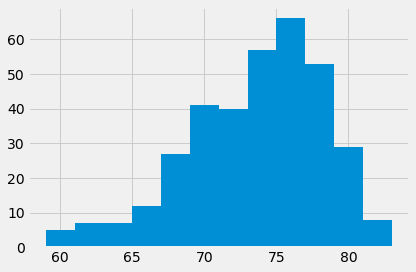

In [58]:
# Plot the results as a histogram

bins = 12
x = results

plt.figure()
plt.hist(x, bins=bins)
plt.tight_layout()
plt.show()

# Close session

In [59]:
# Close Session
session.close()